# Titanic Survival Prediction - Machine Learning Project

This notebook presents a complete machine learning workflow to predict passenger survival on the Titanic using the famous Titanic dataset from Kaggle.

We will go through the following key steps:
1. **Data Loading** – Import the dataset.
2. **Data Exploration & Visualization** – Understand the structure and patterns.
3. **Data Cleaning & Preprocessing** – Handle missing values and encode features.
4. **Model Training** – Train a classifier to predict survival.
5. **Evaluation** – Measure the model's performance.
6. **Prediction Example** – Make predictions with the trained model.

The goal is to build a simple yet effective predictive model using Python and scikit-learn, all within a single notebook for simplicity and clarity.


### Imports & warnings

In [3]:
# Titanic Survival Classification
# Task 1 - CodeAlpha Data Science Internship

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')

### Data Loading

In [4]:
# Load the Titanic dataset from Kaggle
# Download train.csv from: https://www.kaggle.com/c/titanic/data
print("=== TITANIC SURVIVAL CLASSIFICATION ===")
print("Loading Titanic dataset from Kaggle...")

# Load the actual Kaggle Titanic dataset
# Make sure you have downloaded train.csv from Kaggle
try:
    df = pd.read_csv('train.csv')  # Kaggle's train.csv file
    print("✅ Kaggle Titanic dataset loaded successfully!")
except FileNotFoundError:
    print("❌ train.csv not found. Please download it from:")
    print("   https://www.kaggle.com/c/titanic/data")
    print("📋 Using seaborn's titanic dataset as fallback...")
    df = sns.load_dataset('titanic')
    # Rename columns to match Kaggle format
    df.rename(columns={'survived': 'Survived', 'pclass': 'Pclass', 'sex': 'Sex', 
                      'age': 'Age', 'sibsp': 'SibSp', 'parch': 'Parch', 
                      'fare': 'Fare', 'embarked': 'Embarked'}, inplace=True)

print(f"Dataset shape: {df.shape}")
print("\nFirst 5 rows:")
print(df.head())

print("\nDataset Info:")
print(df.info())

print("\nMissing values:")
print(df.isnull().sum())

=== TITANIC SURVIVAL CLASSIFICATION ===
Loading Titanic dataset from Kaggle...
✅ Kaggle Titanic dataset loaded successfully!
Dataset shape: (891, 12)

First 5 rows:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        

### Data Preprocessing

In [5]:
print("\n=== DATA PREPROCESSING ===")

# Fill missing values
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)
if 'Cabin' in df.columns:
    df['Cabin'].fillna('Unknown', inplace=True)

# Feature engineering
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1
df['IsAlone'] = (df['FamilySize'] == 1).astype(int)

if 'Name' in df.columns:
    df['Title'] = df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
    df['Title'] = df['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 
                                      'Sir', 'Jonkheer', 'Dona'], 'Rare')
    df['Title'] = df['Title'].replace(['Mlle', 'Ms'], 'Miss')
    df['Title'] = df['Title'].replace('Mme', 'Mrs')

# Encode categorical features
le = LabelEncoder()
df['Sex_encoded'] = le.fit_transform(df['Sex'])
df['Embarked_encoded'] = le.fit_transform(df['Embarked'])

features = ['Pclass', 'Sex_encoded', 'Age', 'SibSp', 'Parch', 'Fare', 
            'Embarked_encoded', 'FamilySize', 'IsAlone']

if 'Title' in df.columns:
    df['Title_encoded'] = le.fit_transform(df['Title'])
    features.append('Title_encoded')

X = df[features]
y = df['Survived']

print(f"Features selected: {features}")
print(f"Target variable: Survived")



=== DATA PREPROCESSING ===
Features selected: ['Pclass', 'Sex_encoded', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked_encoded', 'FamilySize', 'IsAlone', 'Title_encoded']
Target variable: Survived


### Exploratory Data Analysis


=== EXPLORATORY DATA ANALYSIS ===


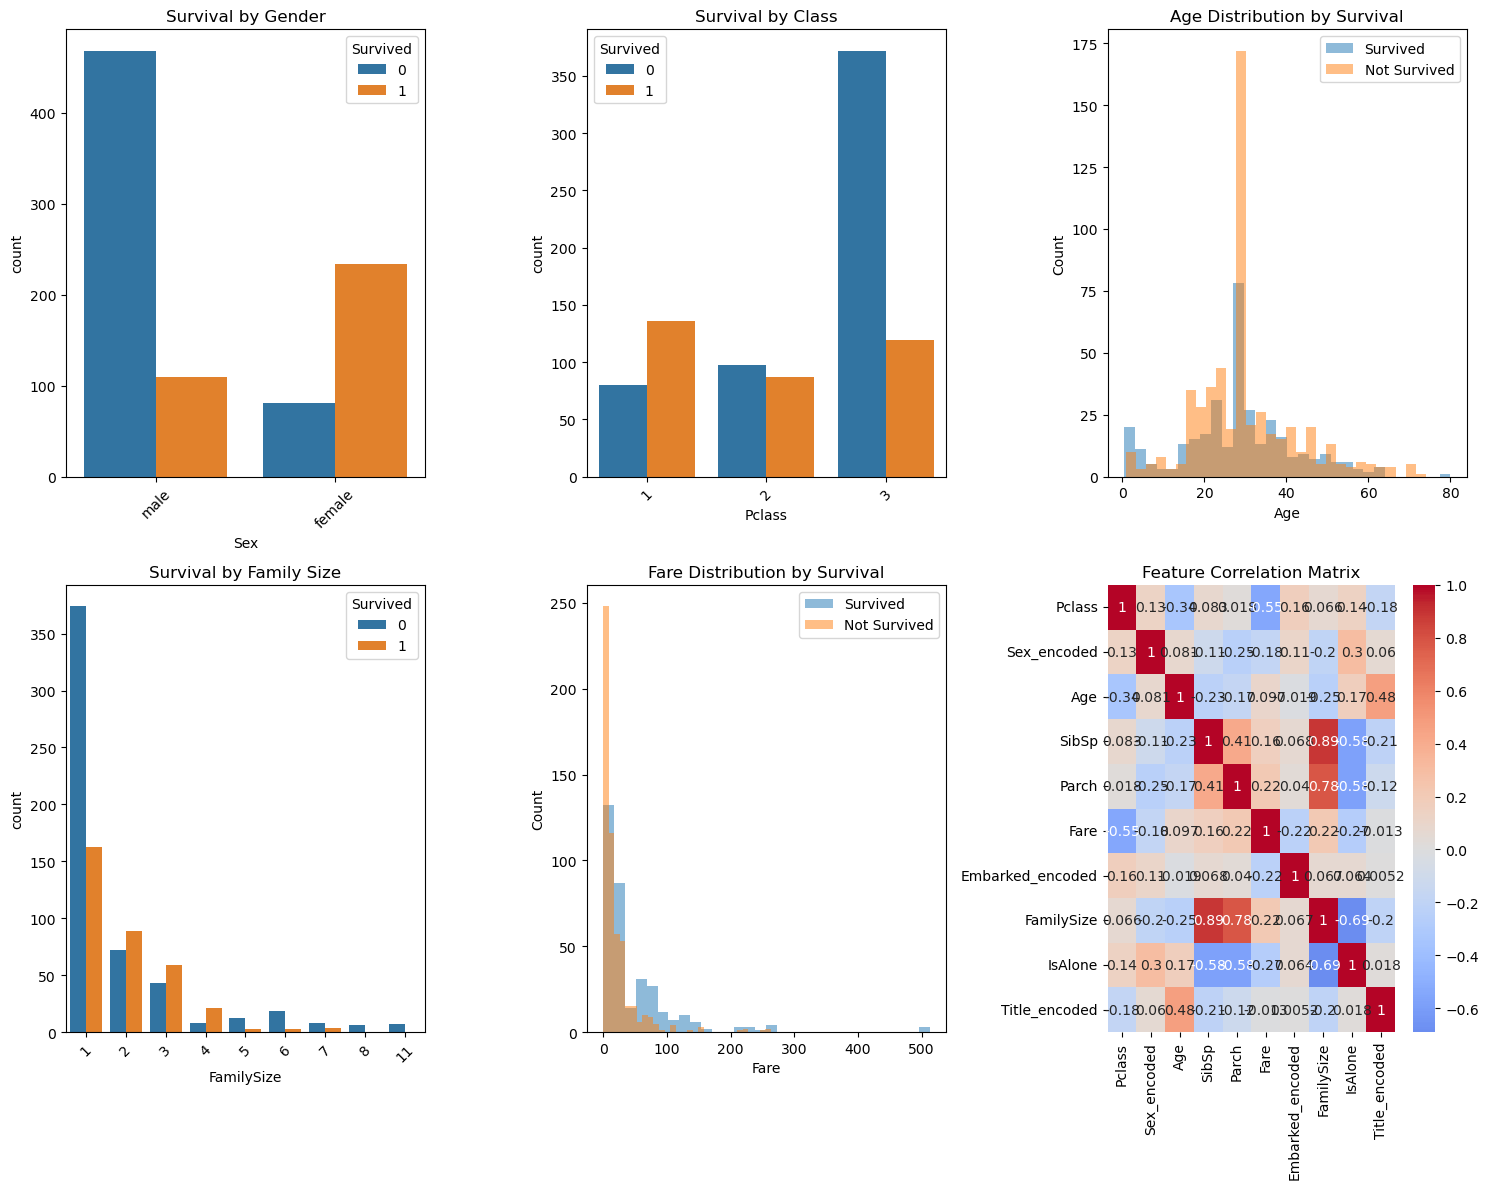

In [6]:
print("\n=== EXPLORATORY DATA ANALYSIS ===")

plt.figure(figsize=(15, 12))

plt.subplot(2, 3, 1)
sns.countplot(data=df, x='Sex', hue='Survived')
plt.title('Survival by Gender')
plt.xticks(rotation=45)

plt.subplot(2, 3, 2)
sns.countplot(data=df, x='Pclass', hue='Survived')
plt.title('Survival by Class')
plt.xticks(rotation=45)

plt.subplot(2, 3, 3)
plt.hist(df[df['Survived']==1]['Age'], alpha=0.5, label='Survived', bins=30)
plt.hist(df[df['Survived']==0]['Age'], alpha=0.5, label='Not Survived', bins=30)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age Distribution by Survival')
plt.legend()

plt.subplot(2, 3, 4)
sns.countplot(data=df, x='FamilySize', hue='Survived')
plt.title('Survival by Family Size')
plt.xticks(rotation=45)

plt.subplot(2, 3, 5)
plt.hist(df[df['Survived']==1]['Fare'], alpha=0.5, label='Survived', bins=30)
plt.hist(df[df['Survived']==0]['Fare'], alpha=0.5, label='Not Survived', bins=30)
plt.xlabel('Fare')
plt.ylabel('Count')
plt.title('Fare Distribution by Survival')
plt.legend()

plt.subplot(2, 3, 6)
sns.heatmap(X.corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Feature Correlation Matrix')

plt.tight_layout()
plt.show()


### Train/Test Split

In [7]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

print(f"\nTraining set size: {X_train.shape[0]}")
print(f"Testing set size: {X_test.shape[0]}")



Training set size: 712
Testing set size: 179


### Model Training & Evaluation

In [8]:
print("\n=== MODEL TRAINING AND EVALUATION ===")

# Random Forest Classifier
print("\n1. Random Forest Classifier:")
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

rf_pred = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_pred)

print(f"Random Forest Accuracy: {rf_accuracy:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, rf_pred))

# Logistic Regression
print("\n2. Logistic Regression:")
lr_model = LogisticRegression(random_state=42, max_iter=1000)
lr_model.fit(X_train, y_train)

lr_pred = lr_model.predict(X_test)
lr_accuracy = accuracy_score(y_test, lr_pred)

print(f"Logistic Regression Accuracy: {lr_accuracy:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, lr_pred))



=== MODEL TRAINING AND EVALUATION ===

1. Random Forest Classifier:
Random Forest Accuracy: 0.8156

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.85      0.85       110
           1       0.76      0.75      0.76        69

    accuracy                           0.82       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.82      0.82      0.82       179


2. Logistic Regression:
Logistic Regression Accuracy: 0.8101

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.89      0.85       110
           1       0.80      0.68      0.73        69

    accuracy                           0.81       179
   macro avg       0.81      0.79      0.79       179
weighted avg       0.81      0.81      0.81       179



### Feature Importance & Confusion Matrix


=== FEATURE IMPORTANCE ANALYSIS ===
Feature Importance (Random Forest):
            feature  importance
5              Fare    0.254599
2               Age    0.215395
1       Sex_encoded    0.201537
9     Title_encoded    0.106857
0            Pclass    0.079681
7        FamilySize    0.046413
6  Embarked_encoded    0.033471
3             SibSp    0.029009
4             Parch    0.021274
8           IsAlone    0.011764


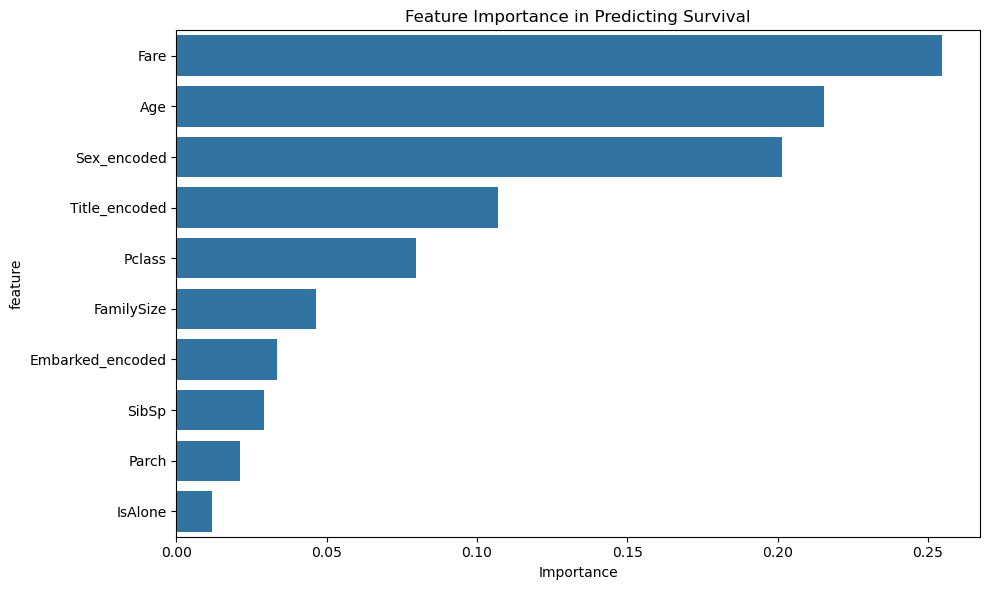

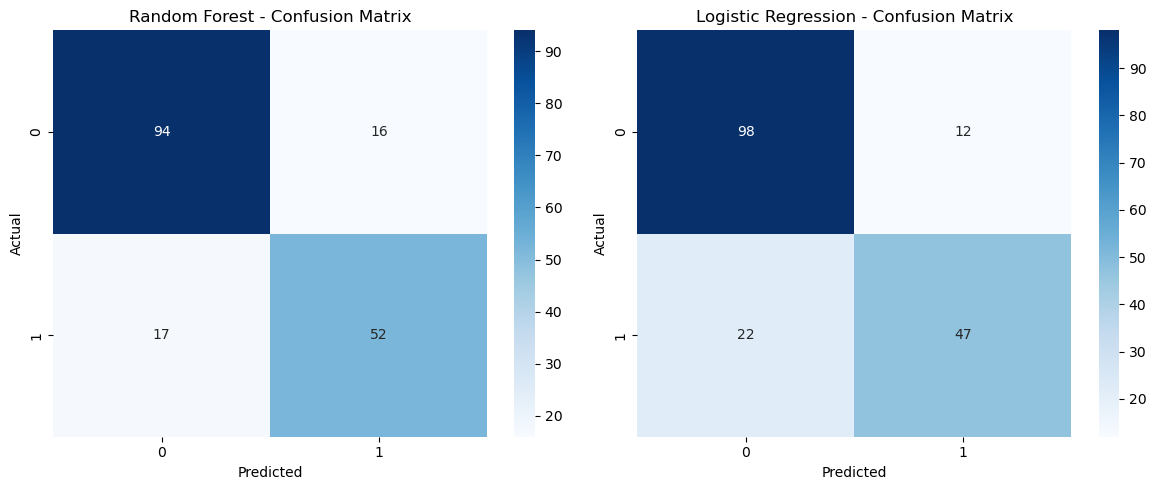

In [9]:
print("\n=== FEATURE IMPORTANCE ANALYSIS ===")
feature_importance = pd.DataFrame({
    'feature': features,
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=False)

print("Feature Importance (Random Forest):")
print(feature_importance)

plt.figure(figsize=(10, 6))
sns.barplot(data=feature_importance, x='importance', y='feature')
plt.title('Feature Importance in Predicting Survival')
plt.xlabel('Importance')
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
cm_rf = confusion_matrix(y_test, rf_pred)
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues')
plt.title('Random Forest - Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')

plt.subplot(1, 2, 2)
cm_lr = confusion_matrix(y_test, lr_pred)
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues')
plt.title('Logistic Regression - Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')

plt.tight_layout()
plt.show()


### Survival Prediction Function + Examples

In [10]:
# Survival Prediction Function
def predict_survival(pclass, sex, age, sibsp, parch, fare, embarked='S'):
    """
    Predict survival probability for a passenger
    
    Parameters:
    - pclass: Passenger class (1, 2, or 3)
    - sex: Gender ('male' or 'female')
    - age: Age in years
    - sibsp: Number of siblings/spouses aboard
    - parch: Number of parents/children aboard
    - fare: Passenger fare
    - embarked: Port of embarkation ('C', 'Q', 'S')
    """
    
    # Encode categorical variables
    sex_encoded = 1 if sex.lower() == 'male' else 0
    embarked_map = {'C': 0, 'Q': 1, 'S': 2}
    embarked_encoded = embarked_map.get(embarked, 2)
    class_encoded = pclass - 1  # Convert to 0-indexed
    
    # Calculate derived features
    family_size = sibsp + parch + 1
    is_alone = 1 if family_size == 1 else 0
    
    # Create feature array
    passenger_features = np.array([[pclass, sex_encoded, age, sibsp, parch, fare, 
                                   embarked_encoded, class_encoded, family_size, is_alone]])
    
    # Make prediction
    survival_prob = rf_model.predict_proba(passenger_features)[0][1]
    survival_prediction = rf_model.predict(passenger_features)[0]
    
    return survival_prediction, survival_prob

In [11]:
# Example predictions
print("\n=== EXAMPLE PREDICTIONS ===")

examples = [
    {"name": "Jack (3rd class male)", "pclass": 3, "sex": "male", "age": 20, "sibsp": 0, "parch": 0, "fare": 7.25},
    {"name": "Rose (1st class female)", "pclass": 1, "sex": "female", "age": 17, "sibsp": 1, "parch": 2, "fare": 151.55},
    {"name": "Middle-aged man (2nd class)", "pclass": 2, "sex": "male", "age": 35, "sibsp": 1, "parch": 1, "fare": 26.00},
    {"name": "Young woman (2nd class)", "pclass": 2, "sex": "female", "age": 25, "sibsp": 0, "parch": 0, "fare": 26.00}
]

for example in examples:
    prediction, probability = predict_survival(
        example["pclass"], example["sex"], example["age"], 
        example["sibsp"], example["parch"], example["fare"]
    )
    
    status = "SURVIVE" if prediction == 1 else "NOT SURVIVE"
    print(f"{example['name']}: {status} (Probability: {probability:.2f})")

print("\n=== SURVIVAL FACTORS ANALYSIS ===")
print("Key factors that increase survival chances:")
print("1. Being female (women and children first policy)")
print("2. Higher passenger class (1st class > 2nd class > 3rd class)")
print("3. Younger age (children had priority)")
print("4. Higher fare (proxy for socio-economic status)")
print("5. Smaller family size (easier to evacuate)")

print(f"\nBest performing model: {'Random Forest' if rf_accuracy > lr_accuracy else 'Logistic Regression'}")
print(f"Final Accuracy: {max(rf_accuracy, lr_accuracy):.4f}")

print("\n=== TASK 1 COMPLETED SUCCESSFULLY ===")


=== EXAMPLE PREDICTIONS ===
Jack (3rd class male): SURVIVE (Probability: 0.56)
Rose (1st class female): SURVIVE (Probability: 0.90)
Middle-aged man (2nd class): SURVIVE (Probability: 0.56)
Young woman (2nd class): SURVIVE (Probability: 0.99)

=== SURVIVAL FACTORS ANALYSIS ===
Key factors that increase survival chances:
1. Being female (women and children first policy)
2. Higher passenger class (1st class > 2nd class > 3rd class)
3. Younger age (children had priority)
4. Higher fare (proxy for socio-economic status)
5. Smaller family size (easier to evacuate)

Best performing model: Random Forest
Final Accuracy: 0.8156

=== TASK 1 COMPLETED SUCCESSFULLY ===
